# Semana 7 Features

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [175]:
#Lendo os dados do Titanic
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_full = pd.merge(df_train,df_test,how='outer')
df_full.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.000,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1.000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1.000,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S


In [176]:
df_train_features = df_full.drop(['PassengerId','Survived'],axis=1)
df_train_features.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [177]:
df_train_features_columns = df_train_features.columns
df_train_features_columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [178]:
df_train_features['Name'][2].split(',')

['Heikkinen', ' Miss. Laina']

In [179]:
coltitle = df_train_features['Name'].apply(
    lambda s: pd.Series(
        {
            'Title': s.split(',')[1].split('.')[0].strip(),
          # 'LastName': s.split(',')[0].strip(),
           # 'FirstName': s.split(',')[1].split('.')[1].strip()
        }
    ))
df_train_features = pd.concat([df_train_features, coltitle], axis=1) 
df_train_features.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,Mrs


In [180]:
numerical_features = df_train_features.select_dtypes(['float64','int64']).columns
numerical_features 

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [181]:
df_train_features.Pclass.unique()

array([3, 1, 2])

In [182]:
df_train_features[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 5 columns):
Pclass    1309 non-null int64
Age       1046 non-null float64
SibSp     1309 non-null int64
Parch     1309 non-null int64
Fare      1308 non-null float64
dtypes: float64(2), int64(3)
memory usage: 101.4 KB


In [183]:
#CRIANDO UM PIPE LINE DE TRANSFORMAÇÃO
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']
pipe1 = make_pipeline(SimpleImputer(strategy="median"),
                              Normalizer(),
                              MinMaxScaler()
                          )
col_trans1 = make_column_transformer((pipe1,numeric_cols))

make_pipe1= col_trans1.fit(df_train_features)

make_pipe1.transform(df_train_features)

pipe1_df = pd.DataFrame(data=make_pipe1.transform(df_train_features),\
                        columns=[s + '_' for s in numeric_cols])

pipe1_df
df_train_features = pd.concat([df_train_features,pipe1_df],axis=1)
df_train_features.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_,SibSp_,Parch_,Fare_
0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,Mr,0.949,0.208,0.000,0.313
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,Mrs,0.467,0.060,0.000,0.882


In [184]:
df_train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Title       1309 non-null object
Age_        1309 non-null float64
SibSp_      1309 non-null float64
Parch_      1309 non-null float64
Fare_       1309 non-null float64
dtypes: float64(6), int64(3), object(6)
memory usage: 203.6+ KB


In [185]:
df_train_features.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [186]:
one_hot_cols = ['Sex', 'Cabin','Embarked']

pipe2 = make_pipeline(SimpleImputer(strategy="most_frequent"),
                          #OneHotEncoder(sparse=False)
                          )

col_trans2 = make_column_transformer((pipe2,one_hot_cols))

make_pipe2 = col_trans2.fit(df_train_features)

pipe2_df = pd.DataFrame(data=make_pipe2.transform(df_train_features),columns=[s + '_' for s in one_hot_cols])
df_train_features = pd.concat([df_train_features,pipe2_df],axis=1)
df_train_features.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_,SibSp_,Parch_,Fare_,Sex_,Cabin_,Embarked_
0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,Mr,0.949,0.208,0.000,0.313,male,C23 C25 C27,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,Mrs,0.467,0.060,0.000,0.882,female,C85,C


In [187]:
df_train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Pclass       1309 non-null int64
Name         1309 non-null object
Sex          1309 non-null object
Age          1046 non-null float64
SibSp        1309 non-null int64
Parch        1309 non-null int64
Ticket       1309 non-null object
Fare         1308 non-null float64
Cabin        295 non-null object
Embarked     1307 non-null object
Title        1309 non-null object
Age_         1309 non-null float64
SibSp_       1309 non-null float64
Parch_       1309 non-null float64
Fare_        1309 non-null float64
Sex_         1309 non-null object
Cabin_       1309 non-null object
Embarked_    1309 non-null object
dtypes: float64(6), int64(3), object(9)
memory usage: 234.3+ KB


In [188]:
keep_cols    = ['Pclass','Title']
one_hot_cols = ['Sex', 'Cabin','Embarked']
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']

full_cols = np.append(np.append(keep_cols,[s + '_' for s in one_hot_cols]),[s + '_' for s in numeric_cols])
full_cols

array(['Pclass', 'Title', 'Sex_', 'Cabin_', 'Embarked_', 'Age_', 'SibSp_',
       'Parch_', 'Fare_'], dtype='<U9')

In [189]:
#OneHotEncode pela get_dummies
df_train_features = pd.get_dummies(df_train_features[full_cols]) 
df_train_features.head(3)

,Pclass,Age_,SibSp_,Parch_,Fare_,Title_Capt,Title_Col,Title_Don,Title_Dona,Title_Dr,...,Cabin__F G73,Cabin__F2,Cabin__F33,Cabin__F38,Cabin__F4,Cabin__G6,Cabin__T,Embarked__C,Embarked__Q,Embarked__S
0,3,0.949,0.208,0.000,0.313,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.467,0.060,0.000,0.882,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,0.956,0.000,0.000,0.292,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [191]:
list(df_train_features.columns)

['Pclass',
 'Age_',
 'SibSp_',
 'Parch_',
 'Fare_',
 'Title_Capt',
 'Title_Col',
 'Title_Don',
 'Title_Dona',
 'Title_Dr',
 'Title_Jonkheer',
 'Title_Lady',
 'Title_Major',
 'Title_Master',
 'Title_Miss',
 'Title_Mlle',
 'Title_Mme',
 'Title_Mr',
 'Title_Mrs',
 'Title_Ms',
 'Title_Rev',
 'Title_Sir',
 'Title_the Countess',
 'Sex__female',
 'Sex__male',
 'Cabin__A10',
 'Cabin__A11',
 'Cabin__A14',
 'Cabin__A16',
 'Cabin__A18',
 'Cabin__A19',
 'Cabin__A20',
 'Cabin__A21',
 'Cabin__A23',
 'Cabin__A24',
 'Cabin__A26',
 'Cabin__A29',
 'Cabin__A31',
 'Cabin__A32',
 'Cabin__A34',
 'Cabin__A36',
 'Cabin__A5',
 'Cabin__A6',
 'Cabin__A7',
 'Cabin__A9',
 'Cabin__B10',
 'Cabin__B101',
 'Cabin__B102',
 'Cabin__B11',
 'Cabin__B18',
 'Cabin__B19',
 'Cabin__B20',
 'Cabin__B22',
 'Cabin__B24',
 'Cabin__B26',
 'Cabin__B28',
 'Cabin__B3',
 'Cabin__B30',
 'Cabin__B35',
 'Cabin__B36',
 'Cabin__B37',
 'Cabin__B38',
 'Cabin__B39',
 'Cabin__B4',
 'Cabin__B41',
 'Cabin__B42',
 'Cabin__B45',
 'Cabin__B49',
 'Ca

In [198]:
df_train_features.info(True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 214 columns):
Pclass                    int64
Age_                      float64
SibSp_                    float64
Parch_                    float64
Fare_                     float64
Title_Capt                uint8
Title_Col                 uint8
Title_Don                 uint8
Title_Dona                uint8
Title_Dr                  uint8
Title_Jonkheer            uint8
Title_Lady                uint8
Title_Major               uint8
Title_Master              uint8
Title_Miss                uint8
Title_Mlle                uint8
Title_Mme                 uint8
Title_Mr                  uint8
Title_Mrs                 uint8
Title_Ms                  uint8
Title_Rev                 uint8
Title_Sir                 uint8
Title_the Countess        uint8
Sex__female               uint8
Sex__male                 uint8
Cabin__A10                uint8
Cabin__A11                uint8
Cabin__A14          

In [220]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_full = pd.merge(df_train,df_test,how='outer')

df_train_features = df_full.drop(['PassengerId'],axis=1)

keep_cols    = ['Pclass','Title']
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare'] 
one_hot_cols = ['Sex', 'Cabin','Embarked']
target       = ['Survived']

target_df = df_train_features[target]
pclass = df_train_features.Pclass
coltitle = df_train_features['Name'].apply(lambda s: pd.Series(
                                                                {'Title': s.split(',')[1].split('.')[0].strip()}
                                                              )
                                        )
median_std_pipe = make_pipeline(
                      SimpleImputer(strategy="median"),
                      StandardScaler()
                      )

freq_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"))

col_transf = make_column_transformer(
                                        (median_std_pipe,numeric_cols),
                                        (freq_pipe,one_hot_cols)
                                    )

pipeline = col_transf.fit(df_train_features.drop(['Survived'],axis=1))

pipe_df = pd.DataFrame(pipeline.transform(df_train_features.drop(['Survived'],axis=1)),columns=numeric_cols + one_hot_cols)


df_to_train = pd.get_dummies(pd.concat([target_df,pclass,coltitle,pipe_df],axis=1))
df_to_train[~df_to_train.Survived.isna()]

,Survived,Pclass,Title_Capt,Title_Col,Title_Don,Title_Dona,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0.000,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.000,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.000,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.000,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1.000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0.000,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1.000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [221]:
from sklearn.linear_model import LinearRegression

In [222]:
linear_model = LinearRegression()

In [226]:
X = df_to_train[~df_to_train.Survived.isna()].drop(['Survived'],axis=1)
Y = df_to_train[~df_to_train.Survived.isna()].Survived
linear_model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [224]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_full = pd.merge(df_train,df_test,how='outer')


df_test_features = df_full.drop(['PassengerId'],axis=1)

target_df = df_test_features.Survived
keep_cols    = ['Pclass','Title']
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare'] 
one_hot_cols = ['Sex', 'Cabin','Embarked']

pclass = df_test_features.Pclass
coltitle = df_test_features['Name'].apply(lambda s: pd.Series(
                                                                {'Title': s.split(',')[1].split('.')[0].strip()}
                                                              )
                                        )

pipe_df = pd.DataFrame(pipeline.transform(df_test_features.drop(['Survived'],axis=1)),columns=numeric_cols + one_hot_cols)
df_to_test = pd.get_dummies(pd.concat([target_df,pclass,coltitle,pipe_df],axis=1))
df_to_test[df_to_test.Survived.isna()]

,Survived,Pclass,Title_Capt,Title_Col,Title_Don,Title_Dona,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
891,nan,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
892,nan,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
893,nan,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
894,nan,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
895,nan,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,nan,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1305,nan,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1306,nan,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1307,nan,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [225]:
X_ = df_to_test[df_to_test.Survived.isna()].drop(['Survived'],axis=1)
pred = pd.DataFrame(linear_model.predict(X_),columns=['Pred'])
pred

,Pred
0,2860011665.899
1,9403305639.022
2,12798383423.231
3,0.155
4,1.074
...,...
413,0.036
414,-141817673740.080
415,-22980019506.268
416,0.036


In [205]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pred_full = pd.concat([df_test,pred],axis=1)

In [206]:
pred_full.Pred = np.round(pred_full.Pred,3)
pred_full

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pred
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q,2860011665.899
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S,9403305639.022
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q,12798383423.231
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S,0.155
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S,1.074
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,nan,0,0,A.5. 3236,8.050,NaN,S,0.036
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000,0,0,PC 17758,108.900,C105,C,-141817673740.080
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500,0,0,SOTON/O.Q. 3101262,7.250,NaN,S,-22980019506.268
416,1308,3,"Ware, Mr. Frederick",male,nan,0,0,359309,8.050,NaN,S,0.036


In [207]:
df_test.shape

(418, 11)

In [116]:
pred.shape

(418, 1)

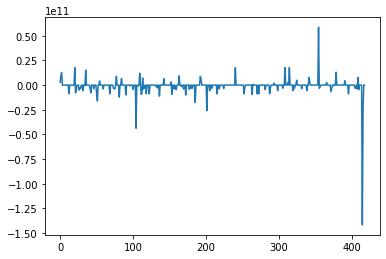

In [208]:
plt.plot(pred_full.Pred)

In [211]:
vivo = pred_full['Pred'].apply(lambda s: pd.Series(
                                                                {'Vivo': True if s > 0.125 else False}
                                                              )
                                        )

In [214]:
pd.concat([pred_full,vivo],axis =1).sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pred,Title
159,1051,3,"Peacock, Mrs. Benjamin (Edith Nile)",female,26.000,0,2,SOTON/O.Q. 3101315,13.775,NaN,S,-4675333008.432,False
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.000,0,1,PC 17755,512.329,B51 B53 B55,C,1.744,True
123,1015,3,"Carver, Mr. Alfred John",male,28.000,0,0,392095,7.250,NaN,S,0.019,False


In [216]:
cat test.csv

In [227]:
df_test_ruim = pd.read_csv('test.csv')

df_test_ruim = df_test_ruim.drop(['PassengerId'],axis=1)

keep_cols    = ['Pclass','Title']
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare'] 
one_hot_cols = ['Sex', 'Cabin','Embarked']

pclass = df_test_ruim.Pclass
coltitle = df_test_ruim['Name'].apply(lambda s: pd.Series(
                                                                {'Title': s.split(',')[1].split('.')[0].strip()}
                                                              )
                                        )

pipe_df = pd.DataFrame(pipeline.transform(df_test_ruim),columns=numeric_cols + one_hot_cols)
df_to_test_ruim = pd.get_dummies(pd.concat([pclass,coltitle,pipe_df],axis=1))
df_to_test_ruim.head(2)

,Pclass,Title_Col,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,...,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [228]:
linear_model.predict(df_to_test_ruim)

ValueError: shapes (418,354) and (604,) not aligned: 354 (dim 1) != 604 (dim 0)

In [229]:
df_to_train.shape

(1309, 605)

In [230]:
df_to_test.shape

(1309, 605)

In [231]:
df_to_test_ruim.shape

(418, 354)

In [244]:
temnotreino = list(df_to_train.columns)
temnotreino

['Survived',
 'Pclass',
 'Title_Capt',
 'Title_Col',
 'Title_Don',
 'Title_Dona',
 'Title_Dr',
 'Title_Jonkheer',
 'Title_Lady',
 'Title_Major',
 'Title_Master',
 'Title_Miss',
 'Title_Mlle',
 'Title_Mme',
 'Title_Mr',
 'Title_Mrs',
 'Title_Ms',
 'Title_Rev',
 'Title_Sir',
 'Title_the Countess',
 'Age_-2.2738356788216234',
 'Age_-2.261432876306322',
 'Age_-2.2544562998914643',
 'Age_-2.235076920961305',
 'Age_-2.228875519703654',
 'Age_-2.2226741184460033',
 'Age_-2.2156975420311458',
 'Age_-2.2094961407734948',
 'Age_-2.1319786250528576',
 'Age_-2.0544611093322205',
 'Age_-1.9769435936115833',
 'Age_-1.8994260778909462',
 'Age_-1.821908562170309',
 'Age_-1.744391046449672',
 'Age_-1.6668735307290348',
 'Age_-1.5893560150083976',
 'Age_-1.5118384992877605',
 'Age_-1.4343209835671233',
 'Age_-1.3955622257068048',
 'Age_-1.3568034678464862',
 'Age_-1.279285952125849',
 'Age_-1.201768436405212',
 'Age_-1.1630096785448933',
 'Age_-1.1242509206845748',
 'Age_-1.0467334049639376',
 'Age_-0.9

In [243]:
temnoteste = list(df_to_test_ruim.columns)
temnoteste

['Pclass',
 'Title_Col',
 'Title_Dona',
 'Title_Dr',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Ms',
 'Title_Rev',
 'Age_-2.2738356788216234',
 'Age_-2.261432876306322',
 'Age_-2.228875519703654',
 'Age_-2.2226741184460033',
 'Age_-2.2156975420311458',
 'Age_-2.2094961407734948',
 'Age_-2.1319786250528576',
 'Age_-2.0544611093322205',
 'Age_-1.8994260778909462',
 'Age_-1.821908562170309',
 'Age_-1.744391046449672',
 'Age_-1.6668735307290348',
 'Age_-1.5893560150083976',
 'Age_-1.5118384992877605',
 'Age_-1.3955622257068048',
 'Age_-1.3568034678464862',
 'Age_-1.279285952125849',
 'Age_-1.201768436405212',
 'Age_-1.1630096785448933',
 'Age_-1.1242509206845748',
 'Age_-1.0467334049639376',
 'Age_-0.9692158892433004',
 'Age_-0.8916983735226632',
 'Age_-0.8529396156623447',
 'Age_-0.8141808578020261',
 'Age_-0.736663342081389',
 'Age_-0.6591458263607518',
 'Age_-0.5816283106401147',
 'Age_-0.5428695527797961',
 'Age_-0.5041107949194775',
 'Age_-0.4265932791988404',


In [246]:
fica = []
sai = []
add =  []
for col in temnotreino:
    if col in temnoteste:
        fica.append(col)
    else:
        add.append(col)

for col in temnoteste:
    if col not in temnotreino:
        sai.append(col)

In [247]:
fica

['Pclass',
 'Title_Col',
 'Title_Dona',
 'Title_Dr',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Ms',
 'Title_Rev',
 'Age_-2.2738356788216234',
 'Age_-2.261432876306322',
 'Age_-2.228875519703654',
 'Age_-2.2226741184460033',
 'Age_-2.2156975420311458',
 'Age_-2.2094961407734948',
 'Age_-2.1319786250528576',
 'Age_-2.0544611093322205',
 'Age_-1.8994260778909462',
 'Age_-1.821908562170309',
 'Age_-1.744391046449672',
 'Age_-1.6668735307290348',
 'Age_-1.5893560150083976',
 'Age_-1.5118384992877605',
 'Age_-1.3955622257068048',
 'Age_-1.3568034678464862',
 'Age_-1.279285952125849',
 'Age_-1.201768436405212',
 'Age_-1.1630096785448933',
 'Age_-1.1242509206845748',
 'Age_-1.0467334049639376',
 'Age_-0.9692158892433004',
 'Age_-0.8916983735226632',
 'Age_-0.8529396156623447',
 'Age_-0.8141808578020261',
 'Age_-0.736663342081389',
 'Age_-0.6591458263607518',
 'Age_-0.5816283106401147',
 'Age_-0.5428695527797961',
 'Age_-0.5041107949194775',
 'Age_-0.4265932791988404',


In [248]:
sai

[]

In [249]:
add

['Survived',
 'Title_Capt',
 'Title_Don',
 'Title_Jonkheer',
 'Title_Lady',
 'Title_Major',
 'Title_Mlle',
 'Title_Mme',
 'Title_Sir',
 'Title_the Countess',
 'Age_-2.2544562998914643',
 'Age_-2.235076920961305',
 'Age_-1.9769435936115833',
 'Age_-1.4343209835671233',
 'Age_-0.6979045842210704',
 'Age_-0.465352037059159',
 'Age_-0.3878345213385218',
 'Age_0.07727057298530103',
 'Age_1.2400333087948583',
 'Age_1.7438971609789997',
 'Age_2.0152084660012295',
 'Age_2.053967223861548',
 'Age_2.7516248653472823',
 'Age_2.8291423810679195',
 'Age_3.139212443950468',
 'Age_3.1779712018107866',
 'Age_3.216729959671105',
 'Age_3.4492825068330166',
 'Age_3.91438760115684',
 'Fare_-0.5658856416819849',
 'Fare_-0.5467930870203236',
 'Fare_-0.5228669742164694',
 'Fare_-0.5187584497956056',
 'Fare_-0.5129581800249743',
 'Fare_-0.5108642826377764',
 'Fare_-0.5086079776970008',
 'Fare_-0.5072391140311319',
 'Fare_-0.5070767064775542',
 'Fare_-0.5057078428116852',
 'Fare_-0.5053849611277867',
 'Fare_-0

In [250]:
for col in add:
    df_to_test_ruim[col] = 0

In [251]:
df_to_test_ruim.shape

(418, 605)

In [255]:
linear_model.predict(df_to_test_ruim.drop('Survived',axis=1))

array([ 4.76886395e+10,  6.29320422e+10,  5.86405687e+10,  6.02238580e+10,
        5.32331333e+10,  6.02238580e+10,  4.93651250e+10,  4.25040369e+10,
        6.17183213e+10,  1.64605629e+10,  5.23299300e+10,  6.02238580e+10,
        6.21037936e+10,  6.02238580e+10,  5.77174113e+10,  6.08840893e+10,
        5.86405687e+10,  5.98443693e+10,  6.02238580e+10,  6.17183213e+10,
        3.60301177e+10, -9.26110824e+10,  6.20978101e+10,  4.12903160e+10,
        5.04698331e+10,  6.02238580e+10,  5.58244242e+10,  5.98443693e+10,
        6.59028219e+10,  5.90101372e+10,  6.02238580e+10,  6.02238580e+10,
        4.13056710e+10,  4.43779889e+10,  5.90101516e+10,  5.98443693e+10,
        6.02238580e+10,  6.02238580e+10,  6.96271637e+10,  5.55485250e+10,
        4.12903160e+10,  6.59028219e+10,  4.92719288e+10,  6.20978101e+10,
        6.88206853e+10,  6.02238580e+10,  6.46891011e+10,  5.18367983e+10,
        6.07652403e+10,  4.43779889e+10,  6.59028219e+10,  5.90101372e+10,
        4.25040369e+10,  

In [254]:
df_to_train.shape

(1309, 605)